In [1]:
####################################################################
###    This is the PYTHON version of program 3.5 from page 94 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the S(E)IR model with multiple stages to create 		   #
### gamma-distributed exposed and infectious periods			   #
###																   #
### n is the total number of infection classes; classes 1 to m are #
### exposed, classes m+1 to n are infectious.					   #
### Birth and death rates are assumed equal.					   #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infected period. Note that movement between classes is scaled by n to maintain the average infected period even when the number of stages changes.

*mu is the death rate and we assume that ν=μ.

*n is the number of stages in the infected period.

*m is the number of stages in the exposed period.

*S0 is the initial proportion of the population that are susceptible in each group.

*I0 is the initial proportion of the population that are infected in each group.

In [3]:
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0

In [4]:
#####################################################################################
### To be compatible with other versions of programs the 
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################

In [5]:
### As well as the default, you may want to compare the structured model:
#( n, m, beta, gamma, mu, S0, I0, ND )=(10.0, 0.0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60.);
### with the unstructured version
#( n, m, beta, gamma, mu, S0, I0, ND )=(1.0, 0.0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60.);
### Or compare the SEIR:
#( n, m, beta, gamma, mu, S0, I0, ND )=(10.0, 5.0, 1.0, 0.1, 0.0, 0.5, 1e-4, 150.);
### with the unstructured version
#( n, m, beta, gamma, mu, S0, I0, ND )=(2.0, 1.0, 1.0, 0.1, 0.0, 0.5, 1e-4, 150.);

In [6]:
I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
print(RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

[[5.00000000e-02 7.69230769e-07 7.69230769e-07 ... 7.69230769e-07
  7.69230769e-07 7.69230769e-07]
 [5.00466672e-02 6.95893629e-07 7.36998225e-07 ... 7.69192452e-07
  7.69192452e-07 7.69192452e-07]
 [5.00933316e-02 6.68798820e-07 7.02202595e-07 ... 7.69154130e-07
  7.69154079e-07 7.69154137e-07]
 ...
 [5.81786543e-02 5.66952967e-05 5.67557482e-05 ... 5.72626726e-05
  5.73147317e-05 5.73661537e-05]
 [5.81689676e-02 5.66310536e-05 5.66921728e-05 ... 5.72066050e-05
  5.72594265e-05 5.73115646e-05]
 [5.81593464e-02 5.65660223e-05 5.66278314e-05 ... 5.71496243e-05
  5.72032220e-05 5.72561119e-05]]


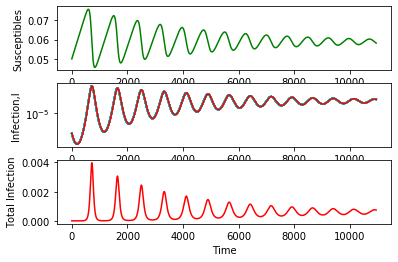

In [7]:
##Ploting
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')
pl.show()